### System Analysis and Decision Support Methods Laboratory Project <br> Michał Dams 246783
# <center>Finding correlation between urbanization rate and ratio: number of stolen cars per 10000 person in polish provinces <center>

Every year few thousands of cars are stolen in Poland. The number of stolen cars per 10000 of residents in each province (called just "the ratio" in the following part of the document) vary significantly. The goal of my project is to find a model of the ratio which is here defined to be dependent on a rate o urbanization in each province.  

### 1. The Data 
I gathered the data from casual sites listed at the end of the report. <br>
    province : names of the provinces. <br>
    population: number of people in the province. <br>
    cars_stolen: number of cars stolen during whole year. <br>
    urbanization_rate: percentage share of urban residents in the total population. <br>
__To avoid obvious dependency between population and number of stolen cars i calculated the ratio of cars stolen per 10000 of residents in each province.__

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import fmin
from numpy.linalg import inv

#Dataset
province=np.array(['dolnoslaskie','mazowieckie','slaskie','swietokrzyskie', 'malopolskie', 'wielkopolskie', 'podlaskie'])
population=np.array([2903710,5365898,4559164,1252900,3382260, 3481625, 1186625])
cars_stolen=np.array([1492,553,2538,315, 1007, 2205, 124])
urbanization_rate=np.array([69.4, 64.7, 77.6 , 44.8, 49.4, 55.2, 60.32])

#Calculate stolen_cars/population (number of stolen cars per 10000 people) ratio 
stolen=(cars_stolen/population)*10000
stolen = [round(x, 2) for x in stolen] 
stolen=np.array(stolen)

### 2. Initial graph

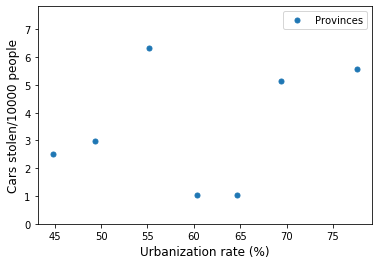

In [ ]:
#First graph
plt.plot( urbanization_rate, stolen, 'o', markersize=5, label="Provinces")
plt.ylim(0, stolen.max()+1.5)
plt.ylabel('Cars stolen/10000 people', fontsize=12)
plt.xlabel('Urbanization rate (%)', fontsize=12)
plt.legend(loc= 'upper right')
plt.show()

### 3. Choosing most accurate model for the data
To find values of following polynomials (up to 4th order) I use following equations
$$ a = (XX^T)^{-1} XY^T $$
$$ \overline{y} = a_nx^n + a_{n-1}x^{n-1} + (...) + a_1x +a_0.$$

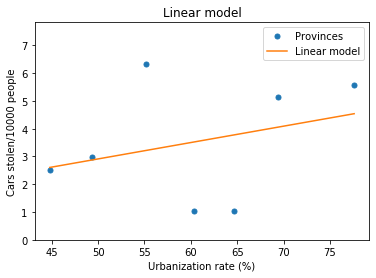

In [ ]:
#Calculate and plot linear model
x = np.linspace(start = urbanization_rate.min(), stop = urbanization_rate.max(), num = 50)
X = np.vstack([np.ones_like(urbanization_rate), urbanization_rate])
Y = np.vstack([stolen]) 
a_opt = inv(X @ X.T) @ X @ Y.T
yy = a_opt[1]*x + a_opt[0]

plt.plot(urbanization_rate, stolen, '.', markersize=10, label='Provinces')
plt.plot(x, yy, label='Linear model')
plt.xlabel('Urbanization rate (%)')
plt.ylabel('Cars stolen/10000 people')
plt.ylim(0, stolen.max()+1.5)
plt.title('Linear model')
plt.legend()
plt.show()

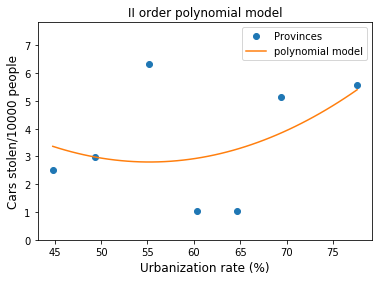

In [ ]:
#Calculate II order polynomial model 
x = np.linspace(urbanization_rate.min(), urbanization_rate.max())
X = np.vstack([np.ones_like(urbanization_rate), urbanization_rate, urbanization_rate**2])
Y = np.vstack([stolen]) 
a_opt = inv(X @ X.T) @ X @ Y.T

def formula(x, a_opt):
    return a_opt[2] *x**2+a_opt[1]*x+a_opt[0] 

#Plot the model
plt.plot(urbanization_rate, stolen, 'o', label='Provinces')
plt.plot(x, formula(x,a_opt), label='polynomial model') 
plt.xlabel('Urbanization rate (%)', fontsize=12)
plt.ylabel('Cars stolen/10000 people', fontsize=12)
plt.ylim(0,stolen.max()+1.5) 
plt.legend(loc='upper right')
plt.title('II order polynomial model')
plt.show()

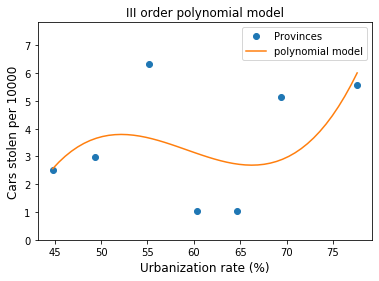

In [ ]:
#Calculate III order polynomial model 
x = np.linspace(urbanization_rate.min(), urbanization_rate.max())
X = np.vstack([np.ones_like(urbanization_rate), urbanization_rate, urbanization_rate**2, urbanization_rate**3])
Y = np.vstack([stolen]) 
a_opt = inv(X @ X.T) @ X @ Y.T

def formula(x, a_opt):
    return a_opt[3]*x**3+a_opt[2] *x**2+a_opt[1]*x+a_opt[0] 

#Plot the model
plt.plot(urbanization_rate, stolen, 'o', label='Provinces')
plt.plot(x, formula(x,a_opt), label='polynomial model') 
plt.xlabel('Urbanization rate (%)', fontsize=12)
plt.ylabel('Cars stolen per 10000', fontsize=12)
plt.ylim(0,stolen.max()+1.5) 
plt.legend(loc='upper right')
plt.title('III order polynomial model')
plt.show()

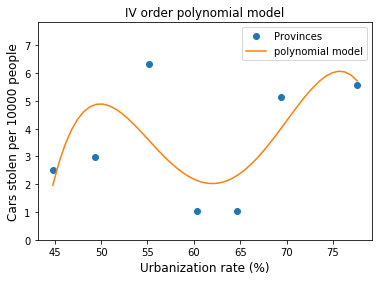

In [ ]:
#Calculate IV order polynomial model 
x = np.linspace(urbanization_rate.min(), urbanization_rate.max())
X = np.vstack([np.ones_like(urbanization_rate), urbanization_rate, 
                   urbanization_rate**2, urbanization_rate**3,urbanization_rate**4])
Y = np.vstack([stolen]) 
a_opt = inv(X @ X.T) @ X @ Y.T

def formula(x, a_opt):
    return a_opt[4]*x**4+a_opt[3]*x**3+a_opt[2] *x**2+a_opt[1]*x+a_opt[0] 

#plot the model
plt.plot(urbanization_rate, stolen, 'o', label='Provinces')
plt.plot(x, formula(x,a_opt), label='polynomial model') 
plt.xlabel('Urbanization rate (%)', fontsize=12)
plt.ylabel('Cars stolen per 10000 people', fontsize=12)
plt.ylim(0,stolen.max()+1.5) 
plt.legend(loc='upper right')
plt.title('IV order polynomial model')
plt.show()

### Conclusion
Having all the polynomial models plotted I decided to pick for further analysis 4th degree polynomial model, as in my opinion it gives the best resemblance to the trend.

### 4. How the model corresponds to the dataset

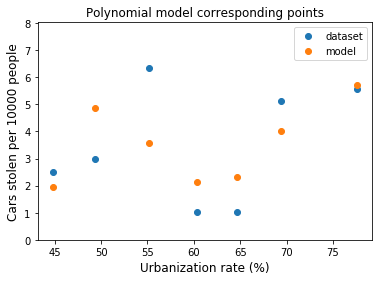

In [ ]:
#function used to plot points corresponding to dataset
def corresponding_points(arr, a_opt):
    temp= np.array([])
    for a in arr:
        temp = np.append(temp,a_opt[4]*a**4+a_opt[3]*a**3+a_opt[2]*a**2+a_opt[1]*a+a_opt[0])
    return temp

#Plot corresponding points
model_points = corresponding_points(urbanization_rate, a_opt)
plt.plot(urbanization_rate, stolen, 'o', label='dataset')
plt.plot(urbanization_rate, model_points, 'o', label='model')
plt.xlabel('Urbanization rate (%)', fontsize=12)
plt.ylabel('Cars stolen per 10000 people', fontsize=12) 
plt.ylim(0,stolen.max()+1.7)
plt.legend (loc='upper right')
plt.title('Polynomial model corresponding points')
plt.show()


### 5. Analysis of the calculations
Basing on the visuals of the 3rd and 4th polynomials we can see that the ratio of stolen cars is higher in the least and the most urbanized provinces. The provinces with urbanization rate around 65% are safer for your car. However full analysis of this topic is much more complex. My analysis doesn’t take such
important factors as nationality of the residents, 
social stratification or the wealth in particular country. Therefore I cannot tell how big influence have urbanization rate on the stolen cars ratio. The results could be different in another data set. This approach had educational purpose. 

### 6. Bibliography
https://www.polskawliczbach.pl/Wojewodztwa <br>
https://autokult.pl/7894,kradziez-samochodow-w-polsce-najpopularniejsze-modele-metody-i-statystyki-wojewodztw <br>
https://byes.pl/wp-content/uploads/2020/Kwirus/SADiSM/1_fundamentals.ipynb <br>
https://byes.pl/wp-content/uploads/2020/Kwirus/SADiSM/2_multivariate_models.ipynb

___Michał Dams 246783___ 